In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [38]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [45]:
df = df.dropna(subset=['Age', 'Embarked'])

In [46]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = pd.get_dummies(df[features])
y = df['Survived']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X_train, X_test, y_train, y_test 

(     Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
 472       2  33.0      1      2  27.7500        True     False       False   
 432       2  42.0      1      0  26.0000        True     False       False   
 666       2  25.0      0      0  13.0000       False      True       False   
 30        1  40.0      0      0  27.7208       False      True        True   
 291       1  19.0      1      0  91.0792        True     False        True   
 ..      ...   ...    ...    ...      ...         ...       ...         ...   
 93        3  26.0      1      2  20.5750       False      True       False   
 135       2  23.0      0      0  15.0458       False      True        True   
 338       3  45.0      0      0   8.0500       False      True       False   
 549       2   8.0      1      1  36.7500       False      True       False   
 131       3  20.0      0      0   7.0500       False      True       False   
 
      Embarked_Q  Embarked_S  
 472       False   

In [49]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [50]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
y_prediction = random_forest.predict(X_test)

In [53]:
accuracy = accuracy_score(y_test, y_prediction)
print(accuracy)

0.7692307692307693


In [54]:
conf_matrix = confusion_matrix(y_test, y_prediction)
print(conf_matrix)


[[66 14]
 [19 44]]


In [55]:

class_report = classification_report(y_test, y_prediction)

print(class_report)

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        80
           1       0.76      0.70      0.73        63

    accuracy                           0.77       143
   macro avg       0.77      0.76      0.76       143
weighted avg       0.77      0.77      0.77       143



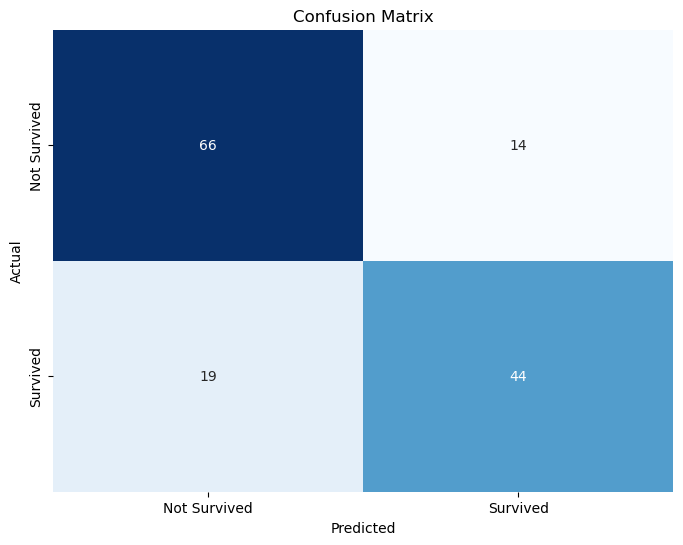

In [56]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()